In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from mplsoccer import Sbopen, Pitch, VerticalPitch

In [4]:
import warnings

In [5]:
import statsmodels.api as sm

In [6]:
warnings.filterwarnings("ignore")

In [7]:
pd.set_option('display.max_rows', None)   # None means display all rows
pd.set_option('display.max_columns', None)   # None means display all columns

In [8]:
parser = Sbopen()

In [9]:
df_wc_matches = parser.match(competition_id=43, season_id=106)

In [10]:
df_wc_matches.head()

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_id,country_name,competition_name,season_id,season_name,home_team_id,home_team_name,home_team_gender,home_team_group,home_team_country_id,home_team_country_name,home_team_managers_id,home_team_managers_name,home_team_managers_nickname,home_team_managers_dob,home_team_managers_country_id,home_team_managers_country_name,away_team_id,away_team_name,away_team_gender,away_team_group,away_team_country_id,away_team_country_name,away_team_managers_id,away_team_managers_name,away_team_managers_nickname,away_team_managers_dob,away_team_managers_country_id,away_team_managers_country_name,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3857256,2022-12-02,2022-12-02 21:00:00,2,3,available,available,2023-02-17 23:45:15.306706,2023-04-26 23:49:58.956186,3,43,International,FIFA World Cup,106,2022,786,Serbia,male,G,203,Serbia,5908,Dragan Stojković,Dragan Stojković,1965-03-03,203,Serbia,773,Switzerland,male,G,221,Switzerland,2832,Murat Yakin,Murat Yakin,1974-09-15,221,Switzerland,1.1.0,2,2,10,Group Stage,1001115,Stadium 974,185,Qatar,1121.0,Fernando Andrés Rapallini,11.0,Argentina
1,3869151,2022-12-03,2022-12-03 21:00:00,2,1,available,available,2023-07-30 07:46:05.382784,2023-07-30 07:48:51.865595,4,43,International,FIFA World Cup,106,2022,779,Argentina,male,None,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,792,Australia,male,None,14,Australia,5696,Graham James Arnold,Graham James Arnold,1963-08-03,14,Australia,1.1.0,2,2,33,Round of 16,1000793,Ahmad bin Ali Stadium,185,Qatar,367.0,Szymon Marciniak,182.0,Poland
2,3857257,2022-11-30,2022-11-30 17:00:00,1,0,available,available,2023-04-28 17:13:10.958725,2023-06-20 11:04:37.638969,3,43,International,FIFA World Cup,106,2022,792,Australia,male,D,14,Australia,5696,Graham James Arnold,Graham James Arnold,1963-08-03,14,Australia,776,Denmark,male,D,61,Denmark,255,Kasper Hjulmand,Kasper Hjulmand,1972-04-09,61,Denmark,1.1.0,2,2,10,Group Stage,117897,Al Janoub Stadium,185,Qatar,2311.0,Mustapha Ghorbal,4.0,Algeria
3,3857258,2022-11-24,2022-11-24 21:00:00,2,0,available,available,2023-06-24 17:17:27.911026,2023-07-11 14:56:31.096588,1,43,International,FIFA World Cup,106,2022,781,Brazil,male,G,31,Brazil,4704,Telê Santana da Silva,Telê Santana,1931-07-26,31,Brazil,786,Serbia,male,G,203,Serbia,5908,Dragan Stojković,Dragan Stojković,1965-03-03,203,Serbia,1.1.0,2,2,10,Group Stage,1001114,Lusail Stadium,185,Qatar,741.0,Alireza Faghani,107.0,"Iran, Islamic Republic of"
4,3857288,2022-11-26,2022-11-26 12:00:00,0,1,available,available,2023-02-28 21:25:20.888552,2023-04-27 00:30:07.835815,2,43,International,FIFA World Cup,106,2022,777,Tunisia,male,D,232,Tunisia,1001303,Jalel Kadri,Jalel Kadri,NaT,232,Tunisia,792,Australia,male,D,14,Australia,5696,Graham James Arnold,Graham James Arnold,1963-08-03,14,Australia,1.1.0,2,2,10,Group Stage,117897,Al Janoub Stadium,185,Qatar,225.0,Daniel Siebert,85.0,Germany


In [11]:
df_arg_matches = df_wc_matches[(df_wc_matches['home_team_name']=="Argentina") | (df_wc_matches['away_team_name']=="Argentina")]

In [12]:
df_fra_matches = df_wc_matches[(df_wc_matches['home_team_name']=="France") | (df_wc_matches['away_team_name']=="France")]

In [13]:
df_cro_matches = df_wc_matches[(df_wc_matches['home_team_name']=="Croatia") | (df_wc_matches['away_team_name']=="Croatia")]

In [14]:
df_bel_matches = df_wc_matches[(df_wc_matches['home_team_name']=="Belgium") | (df_wc_matches['away_team_name']=="Belgium")]

In [15]:
alvarez_shots = pd.DataFrame()
messi_shots = pd.DataFrame()
for arg_match in df_arg_matches.match_id:
    temp_df = parser.event(arg_match)[0]
    temp_ja_df = temp_df[(temp_df.type_name == 'Shot') & (temp_df.player_name == 'Julián Álvarez')& (temp_df.minute < 120)]
    temp_lm_df = temp_df[(temp_df.type_name == 'Shot') & (temp_df.player_name == 'Lionel Andrés Messi Cuccittini') & (temp_df.minute < 120)]
    alvarez_shots = pd.concat([alvarez_shots,temp_ja_df])
    messi_shots = pd.concat([messi_shots,temp_lm_df])

In [16]:
df_fra_matches.match_id

9     3869685
12    3857266
20    3869354
21    3869552
26    3869152
49    3857279
53    3857275
Name: match_id, dtype: int64

In [17]:
giroud_shots = pd.DataFrame()
mbappe_shots = pd.DataFrame()
for fra_match in df_fra_matches.match_id:
    temp_df = parser.event(fra_match)[0]
    temp_og_df = temp_df[(temp_df.type_name == 'Shot') & (temp_df.player_name == 'Olivier Giroud')& (temp_df.minute < 120)]
    temp_km_df = temp_df[(temp_df.type_name == 'Shot') & (temp_df.player_name == 'Kylian Mbappé Lottin') & (temp_df.minute < 120)]
    giroud_shots = pd.concat([giroud_shots,temp_og_df])
    mbappe_shots = pd.concat([mbappe_shots,temp_km_df])

In [18]:
lukaku_shots = pd.DataFrame()
for bel_match in df_bel_matches.match_id:
    temp_df = parser.event(bel_match)[0]
    temp_rl_df = temp_df[(temp_df.type_name == 'Shot') & (temp_df.player_name == 'Romelu Lukaku Menama')& (temp_df.minute < 120)]
    lukaku_shots = pd.concat([lukaku_shots,temp_rl_df])

In [19]:
len(alvarez_shots)

11

In [20]:
len(lukaku_shots[lukaku_shots["outcome_name"]=="Goal"])

0

In [21]:
lukaku_shots.shot_statsbomb_xg.sum()

1.68415473

In [22]:
lukaku_shots.outcome_name.value_counts()

Saved    2
Off T    2
Post     1
Name: outcome_name, dtype: int64

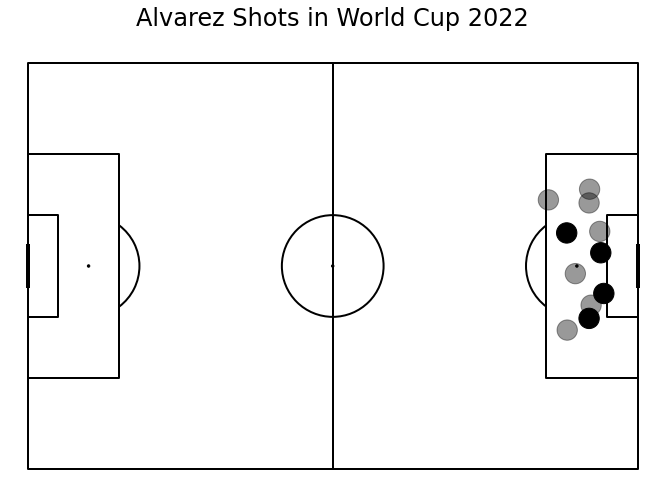

In [23]:
pitch = Pitch(line_color='black')
fig, ax = pitch.draw(figsize = (10,8))

pitchLengthX = 120
pitchWidthY = 80

for i, shot in alvarez_shots.iterrows():
    x = shot['x']
    y = shot['y']
    
    circle_size = 2
    
    if shot['outcome_name'] == 'Goal':
        shot_circle = plt.Circle((x, y), circle_size, color='black')
    else:
        shot_circle = plt.Circle((x, y), circle_size, color='black')
        shot_circle.set_alpha(0.4)
    
    ax.add_patch(shot_circle)
fig.suptitle("Alvarez Shots in World Cup 2022", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()

In [24]:
mbappe_shots_attrs = mbappe_shots[['x','y','end_x','end_y','outcome_name']]

In [25]:
mbappe_shots_attrs['outcome_name'] = mbappe_shots_attrs['outcome_name'].apply(lambda x: 1 if x == "Goal" else 0)

In [26]:
def calculate_distance(x_coord, y_coord):
    point_x, point_y = 120, 40
    return round(np.sqrt((x_coord-point_x)**2 + (y_coord-point_y)**2),2)

In [27]:
mbappe_shots_attrs['distance'] = mbappe_shots_attrs.apply(lambda row: calculate_distance(row['x'], row['y']), axis=1)

In [28]:
mbappe_shots_attrs

,x,y,end_x,end_y,outcome_name,distance
2658,102.5,27.9,120.0,38.8,0,21.28
2928,108.0,40.0,120.0,37.3,1,12.00
2987,104.8,30.1,120.0,41.5,1,18.14
3257,95.9,32.2,100.7,33.5,0,25.33
4198,101.4,26.6,104.5,29.1,0,22.92
4202,108.0,40.0,120.0,36.7,1,12.00
1730,106.0,43.8,120.0,40.0,0,14.51
1932,98.6,18.5,109.8,32.8,0,30.33
2397,104.1,30.1,117.8,36.7,0,18.73
2584,110.8,31.3,120.0,40.1,1,12.66


In [29]:
def calculate_angle(point_a_x, point_a_y):
    point_a = (point_a_x, point_a_y)
    point_b, point_c = (120,36), (120,44)
    
    # Calculate vectors AB and AC
    vector_ab = np.array([point_b[0] - point_a[0], point_b[1] - point_a[1]])
    vector_ac = np.array([point_c[0] - point_a[0], point_c[1] - point_a[1]])

    # Calculate the dot product of AB and AC
    dot_product = np.dot(vector_ab, vector_ac)

    # Calculate the magnitudes of AB and AC
    magnitude_ab = np.linalg.norm(vector_ab)
    magnitude_ac = np.linalg.norm(vector_ac)

    # Calculate the angle in radians using the dot product and magnitudes
    angle_radians = np.arccos(dot_product / (magnitude_ab * magnitude_ac))

    # Convert the angle from radians to degrees
    angle_degrees = np.degrees(angle_radians)

    return round(angle_degrees,2)

In [30]:
mbappe_shots_attrs['angle'] = mbappe_shots_attrs.apply(lambda row: calculate_angle(row['x'], row['y']), axis=1)

In [31]:
# Define the range for normalization
min_value = 0
max_value = 60

# Normalize the 'Scores' column
mbappe_shots_attrs['Normalized_Distance'] = round((mbappe_shots_attrs['distance'] - min_value) / (max_value - min_value),4)

In [32]:
mbappe_shots_attrs

,x,y,end_x,end_y,outcome_name,distance,angle,Normalized_Distance
2658,102.5,27.9,120.0,38.8,0,21.28,17.78,0.3547
2928,108.0,40.0,120.0,37.3,1,12.00,36.87,0.2000
2987,104.8,30.1,120.0,41.5,1,18.14,21.23,0.3023
3257,95.9,32.2,100.7,33.5,0,25.33,17.13,0.4222
4198,101.4,26.6,104.5,29.1,0,22.92,16.28,0.3820
4202,108.0,40.0,120.0,36.7,1,12.00,36.87,0.2000
1730,106.0,43.8,120.0,40.0,0,14.51,29.94,0.2418
1932,98.6,18.5,109.8,32.8,0,30.33,10.72,0.5055
2397,104.1,30.1,117.8,36.7,0,18.73,20.80,0.3122
2584,110.8,31.3,120.0,40.1,1,12.66,27.02,0.2110


### Model 1 - Mbappe

### Figure-6

In [33]:
# Define the response variable (target) and explanatory variables (features)
response_variable = mbappe_shots_attrs['outcome_name']
explanatory_variables = mbappe_shots_attrs[['Normalized_Distance', 'angle']]

# Create the binomial logistic regression model
binomial_model = sm.GLM(response_variable, explanatory_variables, family=sm.families.Binomial())

# Fit the model
mbappe_result = binomial_model.fit()

# Print the summary of the model
print(mbappe_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           outcome_name   No. Observations:                   31
Model:                            GLM   Df Residuals:                       29
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.426
Date:                Wed, 30 Aug 2023   Deviance:                       28.853
Time:                        06:55:05   Pearson chi2:                     28.6
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1905
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Normalized_Distance    -7.0252    

In [34]:
lukaku_shots_attrs = lukaku_shots[['x','y','end_x','end_y','outcome_name']]

In [35]:
lukaku_shots_attrs['outcome_name'] = lukaku_shots_attrs['outcome_name'].apply(lambda x: 1 if x == "Goal" else 0)

In [36]:
lukaku_shots_attrs['distance'] = lukaku_shots_attrs.apply(lambda row: calculate_distance(row['x'], row['y']), axis=1)
lukaku_shots_attrs['angle'] = lukaku_shots_attrs.apply(lambda row: calculate_angle(row['x'], row['y']), axis=1)

In [37]:
lukaku_shots_attrs['Normalized_Distance'] = round((lukaku_shots_attrs['distance'] - min_value) / (max_value - min_value),4)

In [38]:
new_explanatory_variable_1 = lukaku_shots_attrs['Normalized_Distance']
new_explanatory_variable_2 = lukaku_shots_attrs['angle']

# Combine the new explanatory variables
new_explanatory_variables = pd.DataFrame({'explanatory_var_1': new_explanatory_variable_1,
                                          'explanatory_var_2': new_explanatory_variable_2})

# Make predictions on the new data
predictions_probs = mbappe_result.predict(new_explanatory_variables)

# Convert predicted probabilities to binary (0 or 1) based on a threshold (e.g., 0.5)
predictions = (predictions_probs >= 0.5).astype(int)

print(predictions)

2285    1
2832    0
2879    1
3857    1
3958    1
dtype: int32


In [39]:
predictions_probs

2285    0.630345
2832    0.489437
2879    0.724884
3857    0.786641
3958    0.930951
dtype: float64

### End of model 1

In [40]:
messi_shots_attrs = messi_shots[['x','y','end_x','end_y','outcome_name']]

In [41]:
messi_shots_attrs['outcome_name'] = messi_shots_attrs['outcome_name'].apply(lambda x: 1 if x == "Goal" else 0)

In [42]:
messi_shots_attrs['distance'] = messi_shots_attrs.apply(lambda row: calculate_distance(row['x'], row['y']), axis=1)
messi_shots_attrs['angle'] = messi_shots_attrs.apply(lambda row: calculate_angle(row['x'], row['y']), axis=1)

In [43]:
messi_shots_attrs['Normalized_Distance'] = round((messi_shots_attrs['distance'] - min_value) / (max_value - min_value),4)

### Model 2 - Messi 

### Figure-7

In [44]:

# Define the response variable (target) and explanatory variables (features)
response_variable = messi_shots_attrs['outcome_name']
explanatory_variables = messi_shots_attrs[['Normalized_Distance', 'angle']]

# Add an intercept term to the explanatory variables
#explanatory_variables = sm.add_constant(explanatory_variables)

# Create the binomial logistic regression model
binomial_model = sm.GLM(response_variable, explanatory_variables, family=sm.families.Binomial())

# Fit the model
messi_result = binomial_model.fit()

# Print the summary of the model
print(messi_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           outcome_name   No. Observations:                   32
Model:                            GLM   Df Residuals:                       30
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13.100
Date:                Wed, 30 Aug 2023   Deviance:                       26.200
Time:                        06:55:05   Pearson chi2:                     39.5
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2070
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Normalized_Distance    -9.6418    

In [45]:
new_explanatory_variable_1 = lukaku_shots_attrs['Normalized_Distance']
new_explanatory_variable_2 = lukaku_shots_attrs['angle']

# Combine the new explanatory variables
new_explanatory_variables = pd.DataFrame({'explanatory_var_1': new_explanatory_variable_1,
                                          'explanatory_var_2': new_explanatory_variable_2})

# Make predictions on the new data
predictions_probs = messi_result.predict(new_explanatory_variables)

# Convert predicted probabilities to binary (0 or 1) based on a threshold (e.g., 0.5)
predictions = (predictions_probs >= 0.5).astype(int)

print(predictions)

2285    1
2832    1
2879    1
3857    1
3958    1
dtype: int32


### Model 3 - Alvarez  

In [46]:
alvarez_shots_attrs = alvarez_shots[['x','y','end_x','end_y','outcome_name']]

In [47]:
alvarez_shots_attrs['outcome_name'] = alvarez_shots_attrs['outcome_name'].apply(lambda x: 1 if x == "Goal" else 0)

In [48]:
alvarez_shots_attrs['distance'] = alvarez_shots_attrs.apply(lambda row: calculate_distance(row['x'], row['y']), axis=1)
alvarez_shots_attrs['angle'] = alvarez_shots_attrs.apply(lambda row: calculate_angle(row['x'], row['y']), axis=1)

In [49]:
alvarez_shots_attrs['Normalized_Distance'] = round((alvarez_shots_attrs['distance'] - min_value) / (max_value - min_value),4)

### Figure-8

In [50]:

# Define the response variable (target) and explanatory variables (features)
response_variable = alvarez_shots_attrs['outcome_name']
explanatory_variables = alvarez_shots_attrs[['Normalized_Distance', 'angle']]

# Add an intercept term to the explanatory variables
#explanatory_variables = sm.add_constant(explanatory_variables)

# Create the binomial logistic regression model
binomial_model = sm.GLM(response_variable, explanatory_variables, family=sm.families.Binomial())

# Fit the model
alvarez_result = binomial_model.fit()

# Print the summary of the model
print(alvarez_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           outcome_name   No. Observations:                   11
Model:                            GLM   Df Residuals:                        9
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5.7313
Date:                Wed, 30 Aug 2023   Deviance:                       11.463
Time:                        06:55:05   Pearson chi2:                     9.63
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2358
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Normalized_Distance    -9.4579    

In [51]:
new_explanatory_variable_1 = lukaku_shots_attrs['Normalized_Distance']
new_explanatory_variable_2 = lukaku_shots_attrs['angle']

# Combine the new explanatory variables
new_explanatory_variables = pd.DataFrame({'explanatory_var_1': new_explanatory_variable_1,
                                          'explanatory_var_2': new_explanatory_variable_2})


# Make predictions on the new data
predictions_probs = alvarez_result.predict(new_explanatory_variables)

# Convert predicted probabilities to binary (0 or 1) based on a threshold (e.g., 0.5)
predictions = (predictions_probs >= 0.5).astype(int)

print(predictions)

2285    1
2832    1
2879    1
3857    1
3958    1
dtype: int32


# Goal-Keeping

In [52]:
test = parser.event(3869151)[0]

In [53]:
martinez_shots_faced = pd.DataFrame()
for arg_match in df_arg_matches.match_id:
    temp_df = parser.event(arg_match)[0]
    temp_em_df = temp_df[(temp_df.type_name == 'Shot') & (temp_df.team_name != 'Argentina')& (temp_df.minute < 120)]
    martinez_shots_faced = pd.concat([martinez_shots_faced,temp_em_df])

In [54]:
livakovic_shots_faced = pd.DataFrame()
for arg_match in df_cro_matches.match_id:
    temp_df = parser.event(arg_match)[0]
    temp_dl_df = temp_df[(temp_df.type_name == 'Shot') & (temp_df.team_name != 'Croatia')& (temp_df.minute < 120)]
    livakovic_shots_faced = pd.concat([livakovic_shots_faced,temp_dl_df])

In [55]:
lloris_shots_faced = pd.DataFrame()
for arg_match in df_fra_matches.match_id:
    temp_df = parser.event(arg_match)[0]
    temp_hl_df = temp_df[(temp_df.type_name == 'Shot') & (temp_df.team_name != 'France')& (temp_df.minute < 120)]
    lloris_shots_faced = pd.concat([lloris_shots_faced,temp_hl_df])

In [56]:
len(lloris_shots_faced)

79

In [57]:
len(livakovic_shots_faced)

82

In [58]:
len(martinez_shots_faced)

44

In [59]:
livakovic_shots_attrs = livakovic_shots_faced[['x','y','end_x','end_y','outcome_name']]
livakovic_shots_attrs['outcome_name'] = livakovic_shots_attrs['outcome_name'].apply(lambda x: 1 if x == "Goal" else 0)
livakovic_shots_attrs['distance'] = livakovic_shots_attrs.apply(lambda row: calculate_distance(row['x'], row['y']), axis=1)
livakovic_shots_attrs['angle'] = livakovic_shots_attrs.apply(lambda row: calculate_angle(row['x'], row['y']), axis=1)

In [60]:
martinez_shots_attrs = martinez_shots_faced[['x','y','end_x','end_y','outcome_name']]
martinez_shots_attrs['outcome_name'] = martinez_shots_attrs['outcome_name'].apply(lambda x: 1 if x == "Goal" else 0)
martinez_shots_attrs['distance'] = martinez_shots_attrs.apply(lambda row: calculate_distance(row['x'], row['y']), axis=1)
martinez_shots_attrs['angle'] = martinez_shots_attrs.apply(lambda row: calculate_angle(row['x'], row['y']), axis=1)

In [61]:
lloris_shots_attrs = lloris_shots_faced[['x','y','end_x','end_y','outcome_name']]
lloris_shots_attrs['outcome_name'] = lloris_shots_attrs['outcome_name'].apply(lambda x: 1 if x == "Goal" else 0)
lloris_shots_attrs['distance'] = lloris_shots_attrs.apply(lambda row: calculate_distance(row['x'], row['y']), axis=1)
lloris_shots_attrs['angle'] = lloris_shots_attrs.apply(lambda row: calculate_angle(row['x'], row['y']), axis=1)

In [62]:
livakovic_shots_attrs['outcome_name'].sum()

7

In [63]:
martinez_shots_attrs['Normalized_Distance'] = round((martinez_shots_attrs['distance'] - min_value) / (max_value - min_value),4)
lloris_shots_attrs['Normalized_Distance'] = round((lloris_shots_attrs['distance'] - min_value) / (max_value - min_value),4)
livakovic_shots_attrs['Normalized_Distance'] = round((livakovic_shots_attrs['distance'] - min_value) / (max_value - min_value),4)

### Figure-9

In [64]:

# Define the response variable (target) and explanatory variables (features)
response_variable = livakovic_shots_attrs['outcome_name']
explanatory_variables = livakovic_shots_attrs[['Normalized_Distance', 'angle']]

# Add an intercept term to the explanatory variables
#explanatory_variables = sm.add_constant(explanatory_variables)

# Create the binomial logistic regression model
binomial_model = sm.GLM(response_variable, explanatory_variables, family=sm.families.Binomial())

# Fit the model
livakovic_result = binomial_model.fit()

# Print the summary of the model
print(livakovic_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           outcome_name   No. Observations:                   82
Model:                            GLM   Df Residuals:                       80
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17.172
Date:                Wed, 30 Aug 2023   Deviance:                       34.345
Time:                        06:55:20   Pearson chi2:                     39.1
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1517
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Normalized_Distance   -13.9960    

In [65]:
new_explanatory_variable_1 = lloris_shots_attrs['Normalized_Distance']
new_explanatory_variable_2 = lloris_shots_attrs['angle']

# Combine the new explanatory variables
new_explanatory_variables = pd.DataFrame({'explanatory_var_1': new_explanatory_variable_1,
                                          'explanatory_var_2': new_explanatory_variable_2})

# Make predictions on the new data
predictions_probs = livakovic_result.predict(new_explanatory_variables)

# Convert predicted probabilities to binary (0 or 1) based on a threshold (e.g., 0.5)
predictions = (predictions_probs >= 0.5).astype(int)

print(predictions.sum())

2
